In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<font color="#333">Om Jai Shree Ganeshai Namah</font>

In [2]:
#!rm -r all_data

In [3]:
import tensorflow as tf
import imghdr
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

#import urllib.request
#from PIL import Image
import imageio
import math

In [4]:
timg = cv2.imread("../input/dataset/val/OSCC/OSCC_100x_196.jpg")
timg.shape

(1536, 2048, 3)

In [5]:
!rm -r ./all_data

rm: cannot remove './all_data': No such file or directory


In [6]:
!mkdir -p all_data/Normal
!mkdir -p all_data/OSCC

In [7]:
!cp -r ../input/dataset/test/Normal ./all_data/
!cp -r ../input/dataset/test/OSCC ./all_data/

In [8]:
!cp -r ../input/dataset/train/Normal ./all_data/
!cp -r ../input/dataset/train/OSCC ./all_data/

In [9]:
!cp -r ../input/dataset/val/Normal ./all_data/
!cp -r ../input/dataset/val/OSCC ./all_data/

In [10]:
os.listdir('./all_data/Normal')

['aug_194_7977.jpg',
 'aug_76_2845.jpg',
 'aug_173_6579.jpg',
 'aug_191_301.jpg',
 'aug_59_5523.jpg',
 'aug_113_1130.jpg',
 'aug_99_8592.jpg',
 'aug_61_1260.jpg',
 'aug_388_6986.jpg',
 'aug_205_4589.jpg',
 'aug_92_1514.jpg',
 'aug_147_4499.jpg',
 'aug_134_2719.jpg',
 'aug_190_1436.jpg',
 'aug_46_8767.jpg',
 'aug_2_70.jpg',
 'aug_17_7639.jpg',
 'aug_100_1178.jpg',
 'aug_135_9777.jpg',
 'aug_143_9701.jpg',
 'aug_122_8132.jpg',
 'aug_145_5455.jpg',
 'aug_204_4048.jpg',
 'aug_23_242.jpg',
 'aug_40_2613.jpg',
 'aug_145_509.jpg',
 'aug_223_9995.jpg',
 'aug_119_6790.jpg',
 'aug_55_7451.jpg',
 'aug_83_5578.jpg',
 'aug_11_6243.jpg',
 'aug_281_3639.jpg',
 'aug_181_1619.jpg',
 'aug_227_9394.jpg',
 'aug_206_4504.jpg',
 'aug_223_8743.jpg',
 'aug_77_4803.jpg',
 'aug_22_8212.jpg',
 'aug_644_1054.jpg',
 'aug_186_5902.jpg',
 'aug_377_2786.jpg',
 'aug_131_4694.jpg',
 'aug_147_1549.jpg',
 'aug_144_2068.jpg',
 'aug_558_8773.jpg',
 'aug_536_5869.jpg',
 'aug_61_2192.jpg',
 'aug_87_7588.jpg',
 'aug_556_4384.

In [11]:
os.listdir('./all_data')

['Normal', 'OSCC']

In [12]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

2022-10-01 11:01:22.231807: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-01 11:01:22.331908: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-01 11:01:22.332710: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [13]:
#imghdr.what('../input/tom-and-jerry-image-classification/tom_and_jerry/tom_and_jerry/tom/frame1002.jpg')

In [14]:
#!rm -r ./tjdata

In [15]:
#!mkdir -p ./tjdata/jerry
#!mkdir -p ./tjdata/tom

In [16]:
#!cp -r ../input/tom-and-jerry-image-classification/tom_and_jerry/tom_and_jerry/jerry  ./tjdata/

In [17]:
#!cp -r ../input/tom-and-jerry-image-classification/tom_and_jerry/tom_and_jerry/tom ./tjdata/

In [18]:
data_dir = './all_data/'

In [19]:
img_exts = ['jpeg', 'jpg', 'bmp', 'png']

class_name_arr = ['Normal', 'OSCC']

for classi in class_name_arr:
    for img in os.listdir(os.path.join(data_dir, classi)):
        img_path = data_dir + classi +'/'+img
        try : 
            imgcv = cv2.imread(img_path)
            img_ext = imghdr.what(img_path)
            if(img_ext not in img_exts):
                os.remove(img_path)
        except Exception as e:
            print("Issue with Image : {}".format(img_path))

In [20]:
os.listdir('./all_data/OSCC')

['OSCC_100x_43.jpg',
 'aug_601_773.jpg',
 'OSCC_400x_272.jpg',
 'aug_66_6184.jpg',
 'aug_38_9332.jpg',
 'OSCC_400x_43.jpg',
 'aug_211_7505.jpg',
 'aug_451_2609.jpg',
 'aug_312_314.jpg',
 'aug_503_2768.jpg',
 'aug_217_4201.jpg',
 'aug_162_8236.jpg',
 'aug_600_6959.jpg',
 'OSCC_400x_185.jpg',
 'aug_713_8538.jpg',
 'aug_378_9488.jpg',
 'aug_258_3917.jpg',
 'OSCC_400x_288.jpg',
 'OSCC_400x_102.jpg',
 'aug_305_8556.jpg',
 'aug_410_3425.jpg',
 'OSCC_100x_298.jpg',
 'aug_534_7702.jpg',
 'OSCC_400x_263.jpg',
 'aug_142_4286.jpg',
 'aug_370_6380.jpg',
 'OSCC_100x_425.jpg',
 'aug_507_7879.jpg',
 'OSCC_400x_441.jpg',
 'OSCC_100x_37.jpg',
 'aug_423_9677.jpg',
 'aug_594_4477.jpg',
 'OSCC_400x_317.jpg',
 'aug_312_2773.jpg',
 'aug_419_6087.jpg',
 'aug_128_7960.jpg',
 'aug_360_4527.jpg',
 'OSCC_100x_309.jpg',
 'aug_206_2901.jpg',
 'aug_48_7108.jpg',
 'aug_343_5707.jpg',
 'aug_509_4475.jpg',
 'aug_215_3045.jpg',
 'aug_292_2387.jpg',
 'aug_639_9250.jpg',
 'aug_290_9431.jpg',
 'aug_429_6359.jpg',
 'OSCC_1

In [21]:
imgs = 256

In [22]:
data = tf.keras.utils.image_dataset_from_directory(data_dir, image_size=(imgs, imgs))

Found 5192 files belonging to 2 classes.


2022-10-01 11:03:11.273539: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-01 11:03:11.273956: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-01 11:03:11.274810: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-01 11:03:11.275474: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

In [23]:
"""
def normalizeStaining(img, saveFile=None, Io=240, alpha=1, beta=0.15):
    ''' Normalize staining appearence of H&E stained images
    
    Example use:
        see test.py
        
    Input:
        I: RGB input image
        Io: (optional) transmitted light intensity
        
    Output:
        Inorm: normalized image
        H: hematoxylin image
        E: eosin image
    
    Reference: 
        A method for normalizing histology slides for quantitative analysis. M.
        Macenko et al., ISBI 2009
    '''
             
    HERef = np.array([[0.5626, 0.2159],
                      [0.7201, 0.8012],
                      [0.4062, 0.5581]])
        
    maxCRef = np.array([1.9705, 1.0308])
    
    # define height and width of image
    h, w, c = img.shape
    
    # reshape image
    img = img.reshape((-1,3))

    # calculate optical density
    OD = -np.log((img.astype(np.float)+1)/Io)
    
    # remove transparent pixels
    ODhat = OD[~np.any(OD<beta, axis=1)]
        
    # compute eigenvectors
    eigvals, eigvecs = np.linalg.eigh(np.cov(ODhat.T))
    
    #eigvecs *= -1
    
    #project on the plane spanned by the eigenvectors corresponding to the two 
    # largest eigenvalues    
    That = ODhat.dot(eigvecs[:,1:3])
    
    phi = np.arctan2(That[:,1],That[:,0])
    
    minPhi = np.percentile(phi, alpha)
    maxPhi = np.percentile(phi, 100-alpha)
    
    vMin = eigvecs[:,1:3].dot(np.array([(np.cos(minPhi), np.sin(minPhi))]).T)
    vMax = eigvecs[:,1:3].dot(np.array([(np.cos(maxPhi), np.sin(maxPhi))]).T)
    
    # a heuristic to make the vector corresponding to hematoxylin first and the 
    # one corresponding to eosin second
    if vMin[0] > vMax[0]:
        HE = np.array((vMin[:,0], vMax[:,0])).T
    else:
        HE = np.array((vMax[:,0], vMin[:,0])).T
    
    # rows correspond to channels (RGB), columns to OD values
    Y = np.reshape(OD, (-1, 3)).T
    
    # determine concentrations of the individual stains
    C = np.linalg.lstsq(HE,Y, rcond=None)[0]
    
    # normalize stain concentrations
    maxC = np.array([np.percentile(C[0,:], 99), np.percentile(C[1,:],99)])
    tmp = np.divide(maxC,maxCRef)
    C2 = np.divide(C,tmp[:, np.newaxis])
    
    # recreate the image using reference mixing matrix
    Inorm = np.multiply(Io, np.exp(-HERef.dot(C2)))
    Inorm[Inorm>255] = 254
    Inorm = np.reshape(Inorm.T, (h, w, 3)).astype(np.uint8)  
    
    # unmix hematoxylin and eosin
    #H = np.multiply(Io, np.exp(np.expand_dims(-HERef[:,0], axis=1).dot(np.expand_dims(C2[0,:], axis=0))))
    #H[H>255] = 254
    #H = np.reshape(H.T, (h, w, 3)).astype(np.uint8)
    
    #E = np.multiply(Io, np.exp(np.expand_dims(-HERef[:,1], axis=1).dot(np.expand_dims(C2[1,:], axis=0))))
    #E[E>255] = 254
    #E = np.reshape(E.T, (h, w, 3)).astype(np.uint8)
    
    #if saveFile is not None:
    #    Image.fromarray(Inorm).save(saveFile+'.png')
    #    Image.fromarray(H).save(saveFile+'_H.png')
    #    Image.fromarray(E).save(saveFile+'_E.png')

    return Inorm
"""   

"\ndef normalizeStaining(img, saveFile=None, Io=240, alpha=1, beta=0.15):\n    ''' Normalize staining appearence of H&E stained images\n    \n    Example use:\n        see test.py\n        \n    Input:\n        I: RGB input image\n        Io: (optional) transmitted light intensity\n        \n    Output:\n        Inorm: normalized image\n        H: hematoxylin image\n        E: eosin image\n    \n    Reference: \n        A method for normalizing histology slides for quantitative analysis. M.\n        Macenko et al., ISBI 2009\n    '''\n             \n    HERef = np.array([[0.5626, 0.2159],\n                      [0.7201, 0.8012],\n                      [0.4062, 0.5581]])\n        \n    maxCRef = np.array([1.9705, 1.0308])\n    \n    # define height and width of image\n    h, w, c = img.shape\n    \n    # reshape image\n    img = img.reshape((-1,3))\n\n    # calculate optical density\n    OD = -np.log((img.astype(np.float)+1)/Io)\n    \n    # remove transparent pixels\n    ODhat = OD[~np

In [24]:
def preprocess(x, y):
    #xinorm = normalizeStaining(x[0])
    return (x/255, y)

In [25]:
#scaled_data = data.map(lambda x,y : (x/255,y))
scaled_data = data.map(preprocess)

In [26]:
data_iterator = scaled_data.as_numpy_iterator()

2022-10-01 11:03:14.053228: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [27]:
batch = data_iterator.next()

2022-10-01 11:03:17.104031: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 25165824 exceeds 10% of free system memory.


In [28]:
print(batch[0][1].min())
print(batch[0][1].max())

0.0
1.0


2022-10-01 11:03:17.665867: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 25165824 exceeds 10% of free system memory.
2022-10-01 11:03:18.161265: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 25165824 exceeds 10% of free system memory.


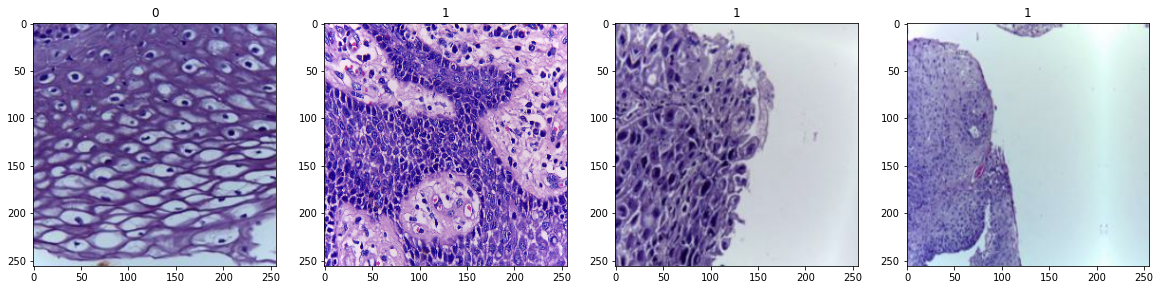

In [29]:
fig, ax =  plt.subplots(ncols = 4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [30]:
len(data) # 3170 = 32[batch_size] * 100[no_batches] approx.

163

In [31]:
train_size = int(len(data)*0.7)
print("training images : {}".format(train_size*32))
val_size = int(len(data)*0.2)
print("validation images : {}".format(val_size*32))
test_size = int(len(data)*0.1)
print("test images : {}".format(test_size*32))


training images : 3648
validation images : 1024
test images : 512


In [32]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [33]:
len(test)

16

In [34]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, MaxPool2D, AveragePooling2D, BatchNormalization, GlobalAveragePooling2D, Input
from tensorflow.keras.regularizers import L2
from tensorflow.keras.optimizers import SGD,Adam
from keras.callbacks import LearningRateScheduler

In [35]:
"""
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation="relu", input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(256, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dropout(0.2))

model.add(Dense(256, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
"""

'\nmodel = Sequential()\n\nmodel.add(Conv2D(16, (3,3), 1, activation="relu", input_shape=(256,256,3)))\nmodel.add(MaxPooling2D())\n\nmodel.add(Conv2D(32, (3,3), 1, activation="relu"))\nmodel.add(MaxPooling2D())\n\nmodel.add(Conv2D(64, (3,3), 1, activation="relu"))\nmodel.add(MaxPooling2D())\n\nmodel.add(Conv2D(128, (3,3), 1, activation="relu"))\nmodel.add(MaxPooling2D())\n\nmodel.add(Conv2D(256, (3,3), 1, activation="relu"))\nmodel.add(MaxPooling2D())\n\nmodel.add(Flatten())\n\nmodel.add(Dropout(0.2))\n\nmodel.add(Dense(256, activation="relu"))\nmodel.add(Dense(1, activation="sigmoid"))\n'

In [36]:
"""
baad model : 54% accuracy 
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation="relu", input_shape=(imgs, imgs, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(256, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation="relu", kernel_regularizer  = L2(0.001)))
model.add(Dropout(0.2))

model.add(Dense(256, activation="relu", kernel_regularizer  = L2(0.001)))
model.add(Dropout(0.2))

model.add(Dense(1, activation="sigmoid"))
"""

'\nbaad model : 54% accuracy \nmodel = Sequential()\n\nmodel.add(Conv2D(16, (3,3), 1, activation="relu", input_shape=(imgs, imgs, 3)))\nmodel.add(MaxPooling2D())\n\nmodel.add(Conv2D(32, (3,3), 1, activation="relu"))\nmodel.add(MaxPooling2D())\n\nmodel.add(Conv2D(64, (3,3), 1, activation="relu"))\nmodel.add(MaxPooling2D())\n\nmodel.add(Conv2D(128, (3,3), 1, activation="relu"))\nmodel.add(MaxPooling2D())\n\nmodel.add(Conv2D(256, (3,3), 1, activation="relu"))\nmodel.add(MaxPooling2D())\n\nmodel.add(Flatten())\n\nmodel.add(Dense(256, activation="relu", kernel_regularizer  = L2(0.001)))\nmodel.add(Dropout(0.2))\n\nmodel.add(Dense(256, activation="relu", kernel_regularizer  = L2(0.001)))\nmodel.add(Dropout(0.2))\n\nmodel.add(Dense(1, activation="sigmoid"))\n'

In [37]:
"""
Best : 86% accuracy
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation="relu", input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Dropout(0.2))

model.add(Conv2D(256, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(512, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
"""

'\nBest : 86% accuracy\nmodel = Sequential()\n\nmodel.add(Conv2D(16, (3,3), 1, activation="relu", input_shape=(256,256,3)))\nmodel.add(MaxPooling2D())\n\nmodel.add(Conv2D(32, (3,3), 1, activation="relu"))\nmodel.add(MaxPooling2D())\n\nmodel.add(Dropout(0.2))\n\nmodel.add(Conv2D(64, (3,3), 1, activation="relu"))\nmodel.add(MaxPooling2D())\n\nmodel.add(Conv2D(128, (3,3), 1, activation="relu"))\nmodel.add(MaxPooling2D())\n\nmodel.add(Dropout(0.2))\n\nmodel.add(Conv2D(256, (3,3), 1, activation="relu"))\nmodel.add(MaxPooling2D())\n\nmodel.add(Conv2D(512, (3,3), 1, activation="relu"))\nmodel.add(MaxPooling2D())\n\nmodel.add(Dropout(0.2))\n\nmodel.add(Flatten())\n\nmodel.add(Dense(512, activation="relu"))\nmodel.add(Dense(1, activation="sigmoid"))\n'

In [38]:
"""
model = Sequential()

model.add(Conv2D(32, (3,3), 1, activation="relu", padding="same", input_shape=(imgs, imgs, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), 1, activation="relu", padding="same"))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), 1, activation="relu", padding="same"))
model.add(MaxPooling2D())

model.add(Conv2D(256, (3,3), 1, activation="relu", padding="same"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
"""


'\nmodel = Sequential()\n\nmodel.add(Conv2D(32, (3,3), 1, activation="relu", padding="same", input_shape=(imgs, imgs, 3)))\nmodel.add(MaxPooling2D())\n\nmodel.add(Conv2D(64, (3,3), 1, activation="relu", padding="same"))\nmodel.add(MaxPooling2D())\n\nmodel.add(Conv2D(128, (3,3), 1, activation="relu", padding="same"))\nmodel.add(MaxPooling2D())\n\nmodel.add(Conv2D(256, (3,3), 1, activation="relu", padding="same"))\nmodel.add(MaxPooling2D())\n\nmodel.add(Flatten())\n\nmodel.add(Dense(256, activation="relu"))\nmodel.add(Dense(1, activation="sigmoid"))\n'

In [39]:
#vgg : Sticking to 51% even after 25 epochs

"""
model = Sequential()
model.add(Conv2D(input_shape=(imgs, imgs, 3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))

model.add(Dense(units=1, activation="sigmoid"))
"""

'\nmodel = Sequential()\nmodel.add(Conv2D(input_shape=(imgs, imgs, 3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))\n\nmodel.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))\nmodel.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))\n\nmodel.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))\nmodel.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))\nmodel.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))\n\nmodel.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))\nmodel.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))\nmodel.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))\nmodel.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))\n\nmodel.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))\nmodel.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))\nmodel.add(Co

In [40]:
""""
model = Sequential()

model.add(Conv2D(64, (3,3), 1, activation="relu", input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Dropout(0.2))

model.add(Conv2D(256, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(512, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Dropout(0.2))

model.add(Conv2D(1024, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(2048, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(2048, activation="relu"))

model.add(Dense(1, activation="sigmoid"))
"""


'"\nmodel = Sequential()\n\nmodel.add(Conv2D(64, (3,3), 1, activation="relu", input_shape=(256,256,3)))\nmodel.add(MaxPooling2D())\n\nmodel.add(Conv2D(128, (3,3), 1, activation="relu"))\nmodel.add(MaxPooling2D())\n\nmodel.add(Dropout(0.2))\n\nmodel.add(Conv2D(256, (3,3), 1, activation="relu"))\nmodel.add(MaxPooling2D())\n\nmodel.add(Conv2D(512, (3,3), 1, activation="relu"))\nmodel.add(MaxPooling2D())\n\nmodel.add(Dropout(0.2))\n\nmodel.add(Conv2D(1024, (3,3), 1, activation="relu"))\nmodel.add(MaxPooling2D())\n\nmodel.add(Conv2D(2048, (3,3), 1, activation="relu"))\nmodel.add(MaxPooling2D())\n\nmodel.add(Flatten())\nmodel.add(Dense(2048, activation="relu"))\n\nmodel.add(Dense(1, activation="sigmoid"))\n'

In [41]:
"""
model = Sequential()

model.add(Conv2D(16, (3,3), activation="relu", input_shape=(imgs, imgs, 3)))
model.add(AveragePooling2D())

model.add(Conv2D(32, (3,3), activation="relu"))
model.add(AveragePooling2D())

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(AveragePooling2D())

#model.add(Dropout(0.5))

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(AveragePooling2D())
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))
"""


'\nmodel = Sequential()\n\nmodel.add(Conv2D(16, (3,3), activation="relu", input_shape=(imgs, imgs, 3)))\nmodel.add(AveragePooling2D())\n\nmodel.add(Conv2D(32, (3,3), activation="relu"))\nmodel.add(AveragePooling2D())\n\nmodel.add(Conv2D(64, (3,3), activation="relu"))\nmodel.add(AveragePooling2D())\n\n#model.add(Dropout(0.5))\n\nmodel.add(Conv2D(64, (3,3), activation="relu"))\nmodel.add(AveragePooling2D())\nmodel.add(Dropout(0.5))\n\nmodel.add(Flatten())\n\nmodel.add(Dense(128, activation="relu"))\nmodel.add(Dropout(0.5))\nmodel.add(Dense(1, activation="sigmoid"))\n'

In [42]:
"""

model = Sequential()

model.add(Conv2D(16, (3,3), activation="relu", input_shape=(imgs, imgs, 3), padding="same"))
model.add(AveragePooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation="relu", padding="same"))
model.add(AveragePooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), activation="relu", padding="same"))
model.add(AveragePooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), activation="relu", padding="same"))
model.add(AveragePooling2D())
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))"""

'\n\nmodel = Sequential()\n\nmodel.add(Conv2D(16, (3,3), activation="relu", input_shape=(imgs, imgs, 3), padding="same"))\nmodel.add(AveragePooling2D())\nmodel.add(Dropout(0.2))\n\nmodel.add(Conv2D(32, (3,3), activation="relu", padding="same"))\nmodel.add(AveragePooling2D())\nmodel.add(Dropout(0.2))\n\nmodel.add(Conv2D(64, (3,3), activation="relu", padding="same"))\nmodel.add(AveragePooling2D())\nmodel.add(Dropout(0.2))\n\nmodel.add(Conv2D(64, (3,3), activation="relu", padding="same"))\nmodel.add(AveragePooling2D())\nmodel.add(Dropout(0.2))\n\nmodel.add(Flatten())\n\nmodel.add(Dense(64, activation="relu"))\nmodel.add(Dropout(0.2))\nmodel.add(Dense(64, activation="relu"))\nmodel.add(Dropout(0.2))\nmodel.add(Dense(1, activation="sigmoid"))'

In [43]:
"""
#vgg architecture 
model = Sequential()
model.add(Conv2D(input_shape=(imgs,imgs,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))
"""

'\n#vgg architecture \nmodel = Sequential()\nmodel.add(Conv2D(input_shape=(imgs,imgs,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))\nmodel.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))\nmodel.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))\n\nmodel.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))\nmodel.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))\nmodel.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))\n\nmodel.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))\nmodel.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))\nmodel.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))\nmodel.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))\n\nmodel.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))\nmodel.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"

In [44]:
"""
#AlexNet Architecture
model = Sequential()

model.add(Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(imgs,imgs,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))

model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model.add(BatchNormalization())

model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))

model.add(Flatten())

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))"""


'\n#AlexNet Architecture\nmodel = Sequential()\n\nmodel.add(Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation=\'relu\', input_shape=(imgs,imgs,3)))\nmodel.add(BatchNormalization())\nmodel.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))\n\nmodel.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation=\'relu\', padding="same"))\nmodel.add(BatchNormalization())\nmodel.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))\n\nmodel.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation=\'relu\', padding="same"))\nmodel.add(BatchNormalization())\n\nmodel.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation=\'relu\', padding="same"))\nmodel.add(BatchNormalization())\n\nmodel.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation=\'relu\', padding="same"))\nmodel.add(BatchNormalization())\nmodel.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))\n\nmodel.add(Flatten())\n\nmodel.add(Dense(4096, activation=\'relu\'))\nmodel.add(Dropout

In [45]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(256,256,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

94781440/94765736 [==============================] - 1s 0us/step


In [46]:
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(1, activation='sigmoid'))

In [47]:
model = resnet_model

In [48]:
#model.compile(Adam(learning_rate=0.001),  loss=tf.losses.BinaryCrossentropy() , metrics=['accuracy'])
model.compile("adam", loss=tf.losses.BinaryCrossentropy() , metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 24,637,313
Trainable params: 1,049,601
Non-trainable params: 23,587,712
_________________________________________________________________


In [50]:
!mkdir logs

logdir = './logs'

In [51]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

2022-10-01 11:03:23.137934: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-10-01 11:03:23.138461: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-10-01 11:03:23.141016: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1614] Profiler found 1 GPUs
2022-10-01 11:03:23.447746: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-10-01 11:03:23.447937: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


In [52]:
hist = model.fit(train, epochs = 10, validation_data=val, callbacks=[tensorboard_callback])

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 1/10


2022-10-01 11:03:29.418501: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 25165824 exceeds 10% of free system memory.
2022-10-01 11:03:30.293568: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


  1/114 [..............................] - ETA: 23:20 - loss: 0.9091 - accuracy: 0.5312

2022-10-01 11:03:36.224834: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-10-01 11:03:36.224885: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


  2/114 [..............................] - ETA: 1:44 - loss: 1.6780 - accuracy: 0.5938 

2022-10-01 11:03:36.937574: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 25165824 exceeds 10% of free system memory.
2022-10-01 11:03:37.068224: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-10-01 11:03:37.069273: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2022-10-01 11:03:37.219905: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 381 callback api events and 378 activity events. 
2022-10-01 11:03:37.239745: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-10-01 11:03:37.282069: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2022_10_01_11_03_37

2022-10-01 11:03:37.297224: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to ./logs/train/plugins/profile/2022_10_01_11_03_37/efca5

114/114 [==============================] - 134s 1s/step - loss: 0.4959 - accuracy: 0.7865 - val_loss: 0.3229 - val_accuracy: 0.8516
Epoch 2/10
114/114 [==============================] - 121s 1s/step - loss: 0.2671 - accuracy: 0.8879 - val_loss: 0.2408 - val_accuracy: 0.9082
Epoch 3/10
114/114 [==============================] - 122s 1s/step - loss: 0.1750 - accuracy: 0.9342 - val_loss: 0.2005 - val_accuracy: 0.9219
Epoch 4/10
114/114 [==============================] - 121s 1s/step - loss: 0.1256 - accuracy: 0.9515 - val_loss: 0.1709 - val_accuracy: 0.9365
Epoch 5/10
114/114 [==============================] - 121s 1s/step - loss: 0.0895 - accuracy: 0.9696 - val_loss: 0.1655 - val_accuracy: 0.9385
Epoch 6/10
114/114 [==============================] - 121s 1s/step - loss: 0.0713 - accuracy: 0.9756 - val_loss: 0.1981 - val_accuracy: 0.9199
Epoch 7/10
114/114 [==============================] - 121s 1s/step - loss: 0.0642 - accuracy: 0.9770 - val_loss: 0.1646 - val_accuracy: 0.9395
Epoch 8/10

In [53]:
hist.history

{'loss': [0.49587658047676086,
  0.26708510518074036,
  0.17503401637077332,
  0.12561801075935364,
  0.08951909840106964,
  0.07131291925907135,
  0.06423529982566833,
  0.04766537994146347,
  0.04790067300200462,
  0.06482571363449097],
 'accuracy': [0.7864583134651184,
  0.8878837823867798,
  0.9342105388641357,
  0.9514802694320679,
  0.9695723652839661,
  0.9756030440330505,
  0.9769737124443054,
  0.9860197305679321,
  0.9851973652839661,
  0.9777960777282715],
 'val_loss': [0.32294946908950806,
  0.2407781034708023,
  0.20051337778568268,
  0.17091631889343262,
  0.16550312936306,
  0.19810348749160767,
  0.16464288532733917,
  0.16205208003520966,
  0.12260819971561432,
  0.2308613359928131],
 'val_accuracy': [0.8515625,
  0.908203125,
  0.921875,
  0.9365234375,
  0.9384765625,
  0.919921875,
  0.939453125,
  0.939453125,
  0.953125,
  0.923828125]}

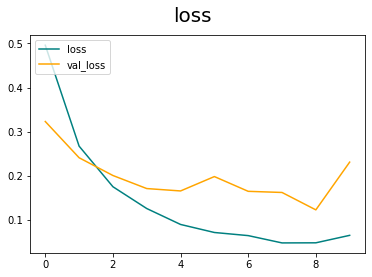

In [54]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

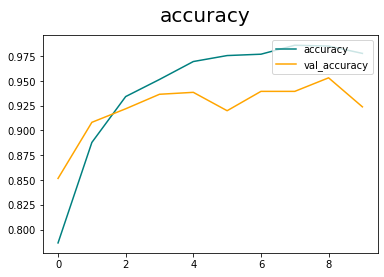

In [55]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('accuracy', fontsize=20)
plt.legend(loc='upper right')
plt.show()

In [56]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [57]:
len(test)

16

In [58]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [59]:
print(f'Precision : {pre.result().numpy()}, Recall: {re.result().numpy()}. Accuracy : {acc.result().numpy()}')

Precision : 0.9198606014251709, Recall: 0.9635036587715149. Accuracy : 0.935546875


In [60]:
#tomurl = 'https://i.pinimg.com/474x/92/a6/2f/92a62f0221f58fe503a15fcb13f5c107--tom-jerry-movies-.jpg'
#jerryurl = 'https://www.meme-arsenal.com/memes/2774744123cafbceb2c1f2aa14c65d82.jpg'

In [61]:
#import requests
#from io import BytesIO

In [62]:
#res = requests.get(tomurl)
#res.content()

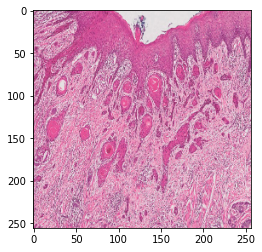

In [63]:
osccpath = "https://media.springernature.com/m685/springer-static/image/art%3A10.1038%2Fsj.bdj.2018.926/MediaObjects/41415_2018_Article_BFsjbdj2018926_Fig1_HTML.jpg"
osccimg  = imageio.v2.imread(osccpath)
osccimg = cv2.resize(osccimg, (imgs, imgs))
osccimg = osccimg/255
plt.imshow(osccimg)
plt.show()

In [64]:
oscc_batch = np.expand_dims(osccimg, 0)

yhat = model.predict(oscc_batch)
print(yhat)

[[0.9999316]]


In [65]:
if yhat < 0.5:
    print("Predicted class is Normal")
else:
    print("Predicted class is OSCC")

Predicted class is OSCC


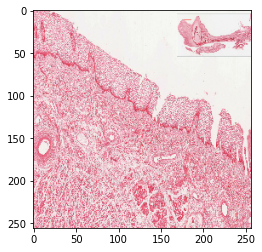

In [66]:
normalpath = "https://histology.medicine.umich.edu/sites/default/files/images/slides/9oral.jpg"
nimg  = imageio.v2.imread(normalpath)
nimg = cv2.resize(nimg, (imgs, imgs))
nimg = nimg/255
plt.imshow(nimg)
plt.show()

In [67]:
nimg_batch = np.expand_dims(nimg, 0)
yhat = model.predict(nimg_batch)
print(yhat)

if yhat < 0.5:
    print("Predicted class is Normal")
else:
    print("Predicted class is OSCC")

[[0.9999243]]
Predicted class is OSCC


In [68]:
from tensorflow.keras.models import load_model

In [69]:
!mkdir("models")

model.save(f'models/on_{acc.result().numpy()}.h5')

/bin/bash: -c: line 0: syntax error near unexpected token `"models"'
/bin/bash: -c: line 0: `mkdir("models")'


In [70]:
ldmodel = load_model(f'models/on_{acc.result().numpy()}.h5')

In [71]:
yhat = ldmodel.predict(nimg_batch)
if yhat < 0.5:
    print("Predicted class is Normal")
else:
    print("Predicted class is OSCC")

Predicted class is OSCC
